In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
from collections import Counter
from pylab import figure, show, legend, ylabel, xlabel
import matplotlib.patches as mpatches

## Data Set

In [2]:
missingValues = ["n/a", "na", " ", "__"]

data_path = "/Users/aniketsingh/Desktop/SeniorProject/data/"

data1 = pd.read_csv(data_path  + "site_weather.csv",na_values = missingValues)
data2 = pd.read_csv(data_path + "ele.csv",na_values = missingValues)
data1.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])
#data1.set_index('Timestamp', inplace=True)
# data = data.reset_index(drop = True)
#First few rows
#########
data2.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])

In [3]:
#JOIN DATA
data = data1.merge(data2, on='Timestamp', how='left')
data.head(1)

,Timestamp,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,mels_S,lig_S,lig_N,mels_N,hvac_N,hvac_S
0,2018-01-01 00:00:00+00:00,11.565,11.465,8.12,79.585,66.29,NaN,NaN,NaN,NaN,36.0,22.5


# Data Preparation 

In [4]:
data = data.drop(columns = ["dew_point_temperature_set_1d", "relative_humidity_set_1", "solar_radiation_set_1", "mels_S","lig_S","lig_N","mels_N"])
data['hvac'] = data['hvac_N'] + data['hvac_S']
data['temp'] = data['air_temp_set_1'] + data['air_temp_set_2']
data = data.drop(columns = ['air_temp_set_2','air_temp_set_1','hvac_S','hvac_N'])
data

,Timestamp,hvac,temp
0,2018-01-01 00:00:00+00:00,58.500000,23.030
1,2018-01-01 00:30:00+00:00,56.900002,22.975
2,2018-01-01 01:00:00+00:00,57.145000,22.110
3,2018-01-01 01:30:00+00:00,56.695000,21.535
4,2018-01-01 02:00:00+00:00,62.100001,21.620
...,...,...,...
35036,2019-12-31 22:00:00+00:00,45.551329,30.370
35037,2019-12-31 22:30:00+00:00,50.990512,31.835
35038,2019-12-31 23:00:00+00:00,49.468421,33.035
35039,2019-12-31 23:30:00+00:00,50.660921,32.730


In [5]:
print("-----------------Null Values-----------------")
print(data.isnull().sum())

-----------------Null Values-----------------
Timestamp       0
hvac         3726
temp          175
dtype: int64


In [6]:
data.fillna(data.mean(), inplace=True)
data['hvac'] = data['hvac'].fillna(data['hvac'].mean())
data['temp'] = data['temp'].fillna(data['temp'].median())

In [7]:
print("-----------------Null Values-----------------")

print(data.isnull().sum())

-----------------Null Values-----------------
Timestamp    0
hvac         0
temp         0
dtype: int64


In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp']

0       2018-01-01 00:00:00+00:00
1       2018-01-01 00:30:00+00:00
2       2018-01-01 01:00:00+00:00
3       2018-01-01 01:30:00+00:00
4       2018-01-01 02:00:00+00:00
                   ...           
35036   2019-12-31 22:00:00+00:00
35037   2019-12-31 22:30:00+00:00
35038   2019-12-31 23:00:00+00:00
35039   2019-12-31 23:30:00+00:00
35040   2020-01-01 00:00:00+00:00
Name: Timestamp, Length: 35041, dtype: datetime64[ns, UTC]

In [9]:
data['Timestamp'].dt.tz
data['Timestamp'] = data['Timestamp'].dt.tz_convert('US/Pacific')

In [10]:
data

,Timestamp,hvac,temp
0,2017-12-31 16:00:00-08:00,58.500000,23.030
1,2017-12-31 16:30:00-08:00,56.900002,22.975
2,2017-12-31 17:00:00-08:00,57.145000,22.110
3,2017-12-31 17:30:00-08:00,56.695000,21.535
4,2017-12-31 18:00:00-08:00,62.100001,21.620
...,...,...,...
35036,2019-12-31 14:00:00-08:00,45.551329,30.370
35037,2019-12-31 14:30:00-08:00,50.990512,31.835
35038,2019-12-31 15:00:00-08:00,49.468421,33.035
35039,2019-12-31 15:30:00-08:00,50.660921,32.730


In [11]:
#data['Timestamp'] = data.index
data['hours'] = pd.to_datetime(data['Timestamp']).dt.hour
data['day'] = pd.to_datetime(data['Timestamp']).dt.day
data['month'] = pd.to_datetime(data['Timestamp']).dt.month
data['minute'] = pd.to_datetime(data['Timestamp']).dt.minute
data['year'] = pd.to_datetime(data['Timestamp']).dt.year
# data = data[data['minute']==30]

In [12]:
data

,Timestamp,hvac,temp,hours,day,month,minute,year
0,2017-12-31 16:00:00-08:00,58.500000,23.030,16,31,12,0,2017
1,2017-12-31 16:30:00-08:00,56.900002,22.975,16,31,12,30,2017
2,2017-12-31 17:00:00-08:00,57.145000,22.110,17,31,12,0,2017
3,2017-12-31 17:30:00-08:00,56.695000,21.535,17,31,12,30,2017
4,2017-12-31 18:00:00-08:00,62.100001,21.620,18,31,12,0,2017
...,...,...,...,...,...,...,...,...
35036,2019-12-31 14:00:00-08:00,45.551329,30.370,14,31,12,0,2019
35037,2019-12-31 14:30:00-08:00,50.990512,31.835,14,31,12,30,2019
35038,2019-12-31 15:00:00-08:00,49.468421,33.035,15,31,12,0,2019
35039,2019-12-31 15:30:00-08:00,50.660921,32.730,15,31,12,30,2019


In [13]:
dataMeanForTemps = pd.DataFrame(data.groupby(by=['hours','month','day','year'])['temp','hvac'].mean())
dataMeanForTemps.reset_index(inplace=True)
dataMeanForTemps

<ipython-input-13-c67eda857810>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataMeanForTemps = pd.DataFrame(data.groupby(by=['hours','month','day','year'])['temp','hvac'].mean())


,hours,month,day,year,temp,hvac
0,0,1,1,2018,20.2400,59.372501
1,0,1,1,2019,14.6900,0.000000
2,0,1,2,2018,27.4975,59.322501
3,0,1,2,2019,16.0775,0.000000
4,0,1,3,2018,29.8300,64.522500
...,...,...,...,...,...,...
17514,23,12,29,2019,13.7750,0.000000
17515,23,12,30,2018,17.6750,0.933406
17516,23,12,30,2019,22.6100,42.432142
17517,23,12,31,2017,20.0300,57.747500


In [14]:
dataMeanForTemps['hours_copy'] = dataMeanForTemps['hours']
dataMeanForTemps['hours'] = dataMeanForTemps.hours.astype('str')
dataMeanForTemps['year'] = dataMeanForTemps.year.astype('str')
dataMeanForTemps['day'] = dataMeanForTemps.day.astype('str')
dataMeanForTemps['month'] = dataMeanForTemps.month.astype('str')

dataMeanForTemps['date_1'] = dataMeanForTemps['year']+"/"+dataMeanForTemps['month']+"/"+dataMeanForTemps['day']

dataMeanForTemps['date_1'] = np.where((dataMeanForTemps['hours_copy'] < 10),
                                    (dataMeanForTemps['date_1'] + " 0" +dataMeanForTemps['hours']),
                                    (dataMeanForTemps['date_1'] + " " +dataMeanForTemps['hours']))

dataMeanForTemps['date'] = pd.to_datetime(dataMeanForTemps['date_1'])

In [15]:
dataFor2018 =  dataMeanForTemps[dataMeanForTemps['year'] == '2018']
dataFor2018 = dataFor2018[['date','temp','hvac']]
dataFor2019 = dataMeanForTemps[dataMeanForTemps['year'] == '2019']
dataFor2019 = dataFor2019[['date','temp','hvac']]

In [16]:
dataFor2018.set_index('date', inplace=True)
dataFor2018
dataFor2019.set_index('date', inplace=True)
dataFor2019

,temp,hvac
date,,
2019-01-01 00:00:00,14.6900,0.000000
2019-01-02 00:00:00,16.0775,0.000000
2019-01-03 00:00:00,17.5850,29.806597
2019-01-04 00:00:00,15.9650,30.155387
2019-01-05 00:00:00,18.5625,43.691382
...,...,...
2019-12-26 23:00:00,17.9075,37.391484
2019-12-27 23:00:00,18.7875,42.417757
2019-12-28 23:00:00,18.3100,39.477045


In [17]:
X_2018 = dataFor2018[['hvac']]
y_2018 = dataFor2018[['temp']]
X_2019 = dataFor2019[['hvac']]
y_2019 = dataFor2019[['temp']]

In [18]:
X_train_2018, X_test_2018, y_train_2018, y_test_2018 = train_test_split(X_2018, y_2018, test_size=0.3, random_state=0)
X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(X_2019, y_2019, test_size=0.3, random_state=0)

In [19]:
# X_train.set_index('date', inplace=True)
X_train_2018

,hvac
date,
2018-02-04 00:00:00,62.747500
2018-12-21 08:00:00,30.168397
2018-12-22 05:00:00,31.955872
2018-11-14 20:00:00,58.330769
2018-08-05 13:00:00,74.940000
...,...
2018-12-26 11:00:00,28.230110
2018-08-16 21:00:00,43.547500
2018-04-26 13:00:00,69.375000


In [20]:
# y_train.set_index('date', inplace=True)
y_train_2018

,temp
date,
2018-02-04 00:00:00,37.4200
2018-12-21 08:00:00,22.0125
2018-12-22 05:00:00,18.1650
2018-11-14 20:00:00,33.0225
2018-08-05 13:00:00,41.6000
...,...
2018-12-26 11:00:00,20.0025
2018-08-16 21:00:00,30.8775
2018-04-26 13:00:00,23.3725


In [21]:
regressor_2018 = LinearRegression()
regressor_2018.fit(X_train_2018, y_train_2018)

LinearRegression()

In [22]:
y_pred_2018 = regressor_2018.predict(X_test_2018)

In [23]:
# dataFor2019 = pd.DataFrame(columns = {'Actual': y_test, 'Predicted': y_pred})

data_for_2018 = X_test_2018
data_for_2018 = data_for_2018.rename(columns = {'hvac':'Actual'})
data_for_2018['Predicted'] = y_pred_2018

In [24]:
data_for_2018

,Actual,Predicted
date,,
2018-01-12 15:00:00,78.850000,32.218869
2018-04-27 05:00:00,46.850000,25.164192
2018-01-20 11:00:00,43.647500,24.458173
2018-07-20 03:00:00,44.950000,24.745321
2018-09-01 07:00:00,47.600981,25.329752
...,...,...
2018-04-04 16:00:00,52.225000,26.349157
2018-11-03 07:00:00,66.137756,29.416345
2018-01-19 12:00:00,74.670000,31.297351


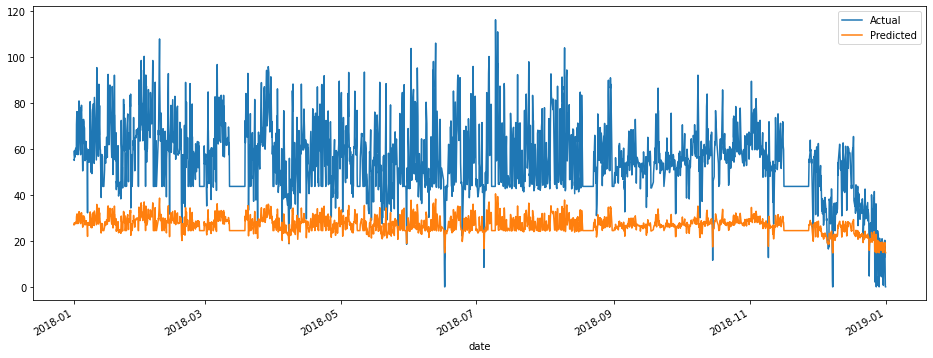

In [25]:
#dataMeanForTemp.set_index('hours', inplace=True)
ser = data_for_2018
ser.plot(kind='line',figsize=(16, 6))


In [26]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [27]:
# plt.plot(X_test, y_pred, label = "Linear Regression", color = 'b')
# plt.scatter(X_test,y_test,label ="Actual Test Data", color ='g', alpha = .7)
# plt.title("Linear Regression Model on 2019 Data")
# plt.legend()
# plt.show()


In [28]:
# X_train.set_index('date', inplace=True)
X_train_2019

,hvac
date,
2019-05-13 02:00:00,27.506474
2019-03-12 23:00:00,15.560167
2019-08-17 18:00:00,23.225015
2019-03-11 12:00:00,28.971041
2019-04-06 03:00:00,12.476221
...,...
2019-12-26 11:00:00,32.461476
2019-08-20 21:00:00,43.691382
2019-04-26 13:00:00,51.171792


In [29]:
# y_train.set_index('date', inplace=True)
y_train_2019

,temp
date,
2019-05-13 02:00:00,21.2000
2019-03-12 23:00:00,15.3950
2019-08-17 18:00:00,35.0350
2019-03-11 12:00:00,25.2400
2019-04-06 03:00:00,23.4075
...,...
2019-12-26 11:00:00,21.3800
2019-08-20 21:00:00,31.8800
2019-04-26 13:00:00,39.2800


In [30]:
regressor_2019 = LinearRegression()
regressor_2019.fit(X_train_2019, y_train_2019)


LinearRegression()

In [31]:
y_pred_2019 = regressor_2019.predict(X_test_2019)

In [32]:
# dataFor2019 = pd.DataFrame(columns = {'Actual': y_test, 'Predicted': y_pred})

data_for_2019 = X_test_2019
data_for_2019 = data_for_2019.rename(columns = {'hvac':'Actual'})
data_for_2019['Predicted'] = y_pred_2019

In [33]:
data_for_2019

,Actual,Predicted
date,,
2019-03-01 09:00:00,44.108102,31.513573
2019-10-16 03:00:00,1.981086,18.870239
2019-03-05 23:00:00,9.008175,20.979238
2019-02-16 02:00:00,0.000000,18.275667
2019-05-24 20:00:00,17.970271,23.668979
...,...,...
2019-09-05 10:00:00,27.967987,26.669535
2019-01-04 13:00:00,43.691382,31.388505
2019-07-28 20:00:00,43.969834,31.472075


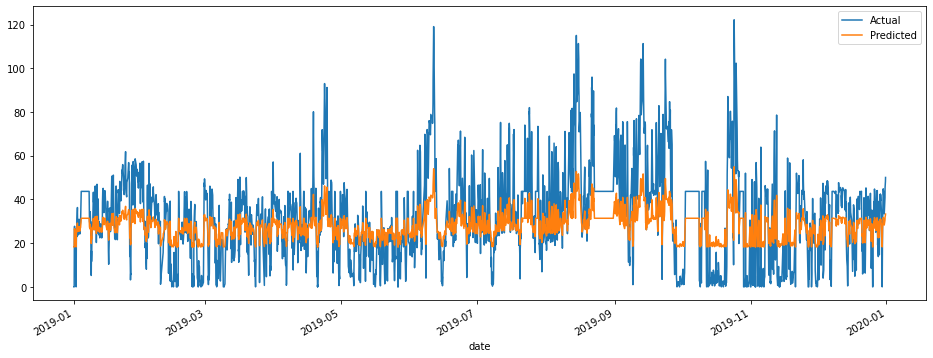

In [34]:
#dataMeanForTemp.set_index('hours', inplace=True)
ser = data_for_2019
ser.plot(kind='line',figsize=(16, 6))


In [35]:
accuracy = regressor_2019.score(X_test_2019,y_test_2019)
print(accuracy*100,'%')


36.14121740158966 %


# MAE and RMSE

In [36]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2019, y_pred_2019))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2019, y_pred_2019))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2019, y_pred_2019)))

Mean Absolute Error: 6.415480194867803
Mean Squared Error: 64.22456224563687
Root Mean Squared Error: 8.01402285033159


In [37]:
data_for_2019


,Actual,Predicted
date,,
2019-03-01 09:00:00,44.108102,31.513573
2019-10-16 03:00:00,1.981086,18.870239
2019-03-05 23:00:00,9.008175,20.979238
2019-02-16 02:00:00,0.000000,18.275667
2019-05-24 20:00:00,17.970271,23.668979
...,...,...
2019-09-05 10:00:00,27.967987,26.669535
2019-01-04 13:00:00,43.691382,31.388505
2019-07-28 20:00:00,43.969834,31.472075


In [38]:
data_for_2019.columns



Index(['Actual', 'Predicted'], dtype='object')

In [39]:
data_for_2019.reset_index(inplace=True)

In [40]:
data_for_2019.columns


Index(['date', 'Actual', 'Predicted'], dtype='object')

In [41]:
data_for_2019

,date,Actual,Predicted
0,2019-03-01 09:00:00,44.108102,31.513573
1,2019-10-16 03:00:00,1.981086,18.870239
2,2019-03-05 23:00:00,9.008175,20.979238
3,2019-02-16 02:00:00,0.000000,18.275667
4,2019-05-24 20:00:00,17.970271,23.668979
...,...,...,...
2621,2019-09-05 10:00:00,27.967987,26.669535
2622,2019-01-04 13:00:00,43.691382,31.388505
2623,2019-07-28 20:00:00,43.969834,31.472075
2624,2019-09-06 23:00:00,29.411345,27.102721


In [42]:
data_for_2019['day'] = pd.to_datetime(data_for_2019['date']).dt.day
data_for_2019['month'] = pd.to_datetime(data_for_2019['date']).dt.month
data_for_2019['year'] = pd.to_datetime(data_for_2019['date']).dt.year

In [43]:
data_for_2019

,date,Actual,Predicted,day,month,year
0,2019-03-01 09:00:00,44.108102,31.513573,1,3,2019
1,2019-10-16 03:00:00,1.981086,18.870239,16,10,2019
2,2019-03-05 23:00:00,9.008175,20.979238,5,3,2019
3,2019-02-16 02:00:00,0.000000,18.275667,16,2,2019
4,2019-05-24 20:00:00,17.970271,23.668979,24,5,2019
...,...,...,...,...,...,...
2621,2019-09-05 10:00:00,27.967987,26.669535,5,9,2019
2622,2019-01-04 13:00:00,43.691382,31.388505,4,1,2019
2623,2019-07-28 20:00:00,43.969834,31.472075,28,7,2019
2624,2019-09-06 23:00:00,29.411345,27.102721,6,9,2019


In [44]:
data_for_2019_month_1 = data_for_2019[data_for_2019['month'] == 1]
data_for_2019_month_2 = data_for_2019[data_for_2019['month'] == 2]
data_for_2019_month_3 = data_for_2019[data_for_2019['month'] == 3]
data_for_2019_month_4 = data_for_2019[data_for_2019['month'] == 4]
data_for_2019_month_5 = data_for_2019[data_for_2019['month'] == 5]
data_for_2019_month_6 = data_for_2019[data_for_2019['month'] == 6]
data_for_2019_month_7 = data_for_2019[data_for_2019['month'] == 7]
data_for_2019_month_8 = data_for_2019[data_for_2019['month'] == 8]
data_for_2019_month_9 = data_for_2019[data_for_2019['month'] == 9]
data_for_2019_month_10 = data_for_2019[data_for_2019['month'] == 10]
data_for_2019_month_11 = data_for_2019[data_for_2019['month'] == 11]
data_for_2019_month_12 = data_for_2019[data_for_2019['month'] == 12]


In [45]:
data_for_2019_month_1

,date,Actual,Predicted,day,month,year
11,2019-01-19 07:00:00,27.526271,26.536965,19,1,2019
12,2019-01-30 08:00:00,48.343742,32.784791,30,1,2019
49,2019-01-28 21:00:00,56.910896,35.356000,28,1,2019
61,2019-01-13 12:00:00,25.488273,25.925313,13,1,2019
87,2019-01-10 00:00:00,38.767571,29.910751,10,1,2019
...,...,...,...,...,...,...
2590,2019-01-29 20:00:00,51.980654,33.876316,29,1,2019
2594,2019-01-22 16:00:00,53.427025,34.310406,22,1,2019
2597,2019-01-03 11:00:00,30.229108,27.348152,3,1,2019
2602,2019-01-07 22:00:00,43.691382,31.388505,7,1,2019


In [46]:
data_for_2019_month_1 = data_for_2019_month_1.sort_values(by="date")
data_for_2019_month_2 = data_for_2019_month_2.sort_values(by="date")
data_for_2019_month_3 = data_for_2019_month_3.sort_values(by="date")
data_for_2019_month_4 = data_for_2019_month_4.sort_values(by="date")
data_for_2019_month_5 = data_for_2019_month_5.sort_values(by="date")
data_for_2019_month_6 = data_for_2019_month_6.sort_values(by="date")
data_for_2019_month_7 = data_for_2019_month_7.sort_values(by="date")
data_for_2019_month_8 = data_for_2019_month_8.sort_values(by="date")
data_for_2019_month_9 = data_for_2019_month_9.sort_values(by="date")
data_for_2019_month_10 = data_for_2019_month_10.sort_values(by="date")
data_for_2019_month_11 = data_for_2019_month_11.sort_values(by="date")
data_for_2019_month_12 = data_for_2019_month_12.sort_values(by="date")




In [47]:
data_for_2019_month_1

,date,Actual,Predicted,day,month,year
2497,2019-01-01 02:00:00,0.000000,18.275667,1,1,2019
1616,2019-01-01 05:00:00,0.000000,18.275667,1,1,2019
894,2019-01-01 06:00:00,17.100543,23.407953,1,1,2019
1870,2019-01-01 07:00:00,26.452909,26.214823,1,1,2019
1234,2019-01-01 09:00:00,27.722988,26.596005,1,1,2019
...,...,...,...,...,...,...
1761,2019-01-31 07:00:00,50.777508,33.515223,31,1,2019
443,2019-01-31 08:00:00,52.604861,34.063655,31,1,2019
1910,2019-01-31 10:00:00,54.998678,34.782098,31,1,2019
786,2019-01-31 16:00:00,57.195560,35.441435,31,1,2019


In [48]:
data_for_2019_month_1 = data_for_2019_month_1.drop(columns = ['day','month','year'])
data_for_2019_month_2 = data_for_2019_month_2.drop(columns = ['day','month','year'])
data_for_2019_month_3 = data_for_2019_month_3.drop(columns = ['day','month','year'])
data_for_2019_month_4 = data_for_2019_month_4.drop(columns = ['day','month','year'])
data_for_2019_month_5 = data_for_2019_month_5.drop(columns = ['day','month','year'])
data_for_2019_month_6 = data_for_2019_month_6.drop(columns = ['day','month','year'])
data_for_2019_month_7 = data_for_2019_month_7.drop(columns = ['day','month','year'])
data_for_2019_month_8 = data_for_2019_month_8.drop(columns = ['day','month','year'])
data_for_2019_month_9 = data_for_2019_month_9.drop(columns = ['day','month','year'])
data_for_2019_month_10 = data_for_2019_month_10.drop(columns = ['day','month','year'])
data_for_2019_month_11 = data_for_2019_month_11.drop(columns = ['day','month','year'])
data_for_2019_month_12 = data_for_2019_month_12.drop(columns = ['day','month','year'])



In [49]:
data_for_2019_month_1

,date,Actual,Predicted
2497,2019-01-01 02:00:00,0.000000,18.275667
1616,2019-01-01 05:00:00,0.000000,18.275667
894,2019-01-01 06:00:00,17.100543,23.407953
1870,2019-01-01 07:00:00,26.452909,26.214823
1234,2019-01-01 09:00:00,27.722988,26.596005
...,...,...,...
1761,2019-01-31 07:00:00,50.777508,33.515223
443,2019-01-31 08:00:00,52.604861,34.063655
1910,2019-01-31 10:00:00,54.998678,34.782098
786,2019-01-31 16:00:00,57.195560,35.441435


In [50]:
data_for_2019_month_1.set_index('date', inplace=True)
data_for_2019_month_2.set_index('date', inplace=True)
data_for_2019_month_3.set_index('date', inplace=True)
data_for_2019_month_4.set_index('date', inplace=True)
data_for_2019_month_5.set_index('date', inplace=True)
data_for_2019_month_6.set_index('date', inplace=True)
data_for_2019_month_7.set_index('date', inplace=True)
data_for_2019_month_8.set_index('date', inplace=True)
data_for_2019_month_9.set_index('date', inplace=True)
data_for_2019_month_10.set_index('date', inplace=True)
data_for_2019_month_11.set_index('date', inplace=True)
data_for_2019_month_12.set_index('date', inplace=True)



# Plots of Actual data and Predicted Data

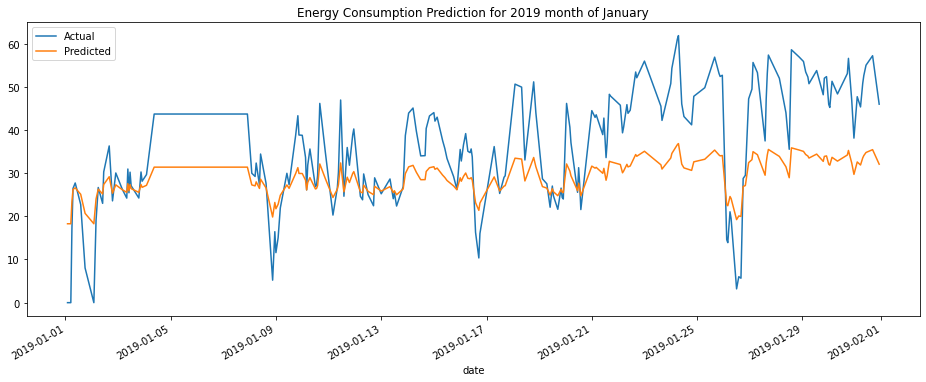

In [51]:
ser = data_for_2019_month_1
ser.plot(kind='line',figsize=(16, 6), title = "Energy Consumption Prediction for 2019 month of January")

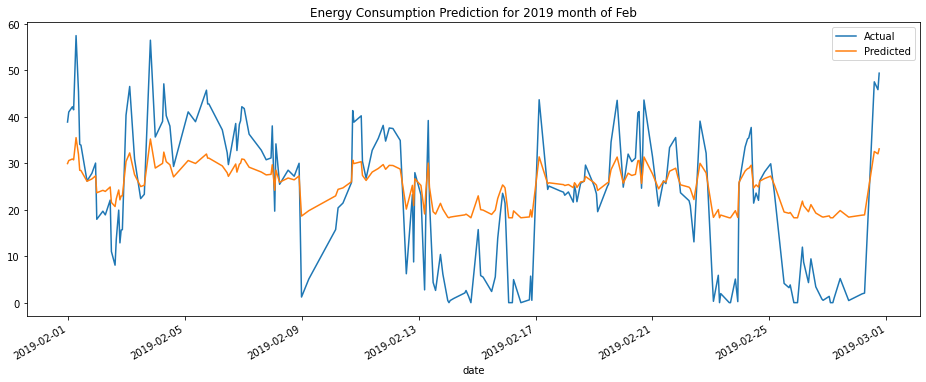

In [52]:
ser = data_for_2019_month_2
ser.plot(kind='line',figsize=(16, 6), title = "Energy Consumption Prediction for 2019 month of Feb")

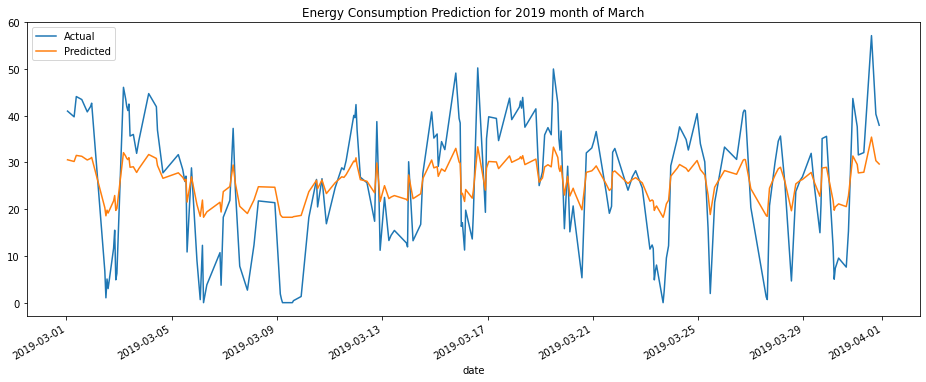

In [53]:
ser = data_for_2019_month_3
ser.plot(kind='line',figsize=(16, 6), title = "Energy Consumption Prediction for 2019 month of March")

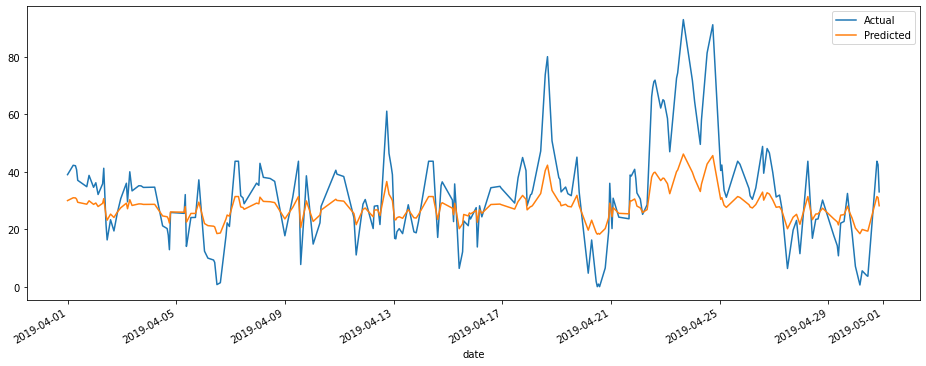

In [54]:
ser = data_for_2019_month_4
ser.plot(kind='line',figsize=(16, 6))

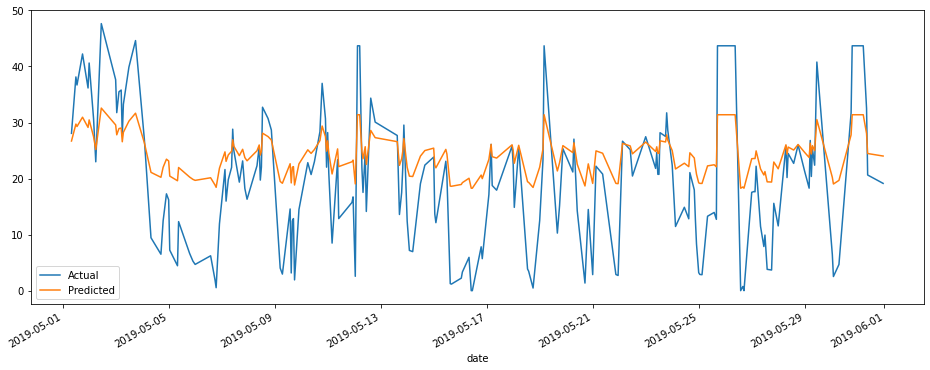

In [55]:
ser = data_for_2019_month_5
ser.plot(kind='line',figsize=(16, 6))

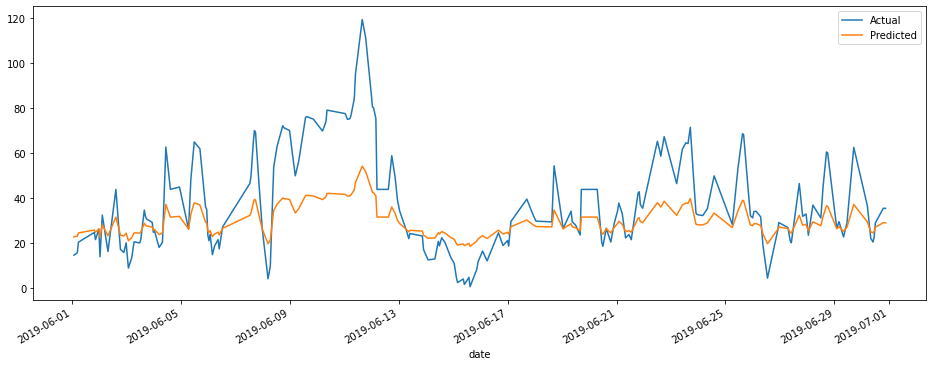

In [56]:
ser = data_for_2019_month_6
ser.plot(kind='line',figsize=(16, 6))

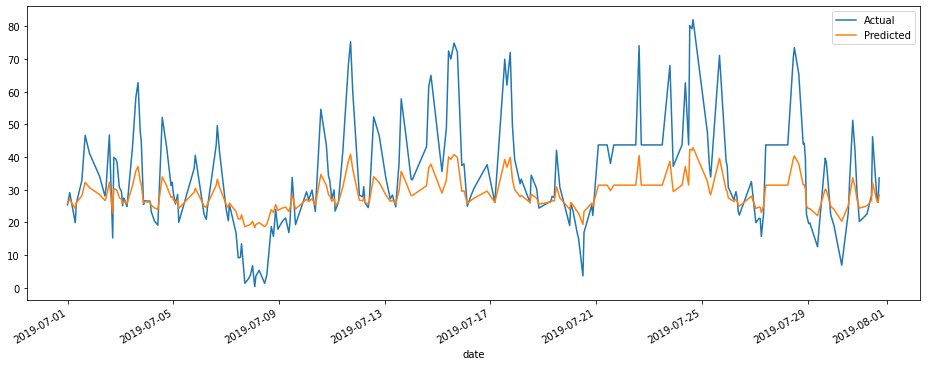

In [57]:
ser = data_for_2019_month_7
ser.plot(kind='line',figsize=(16, 6))

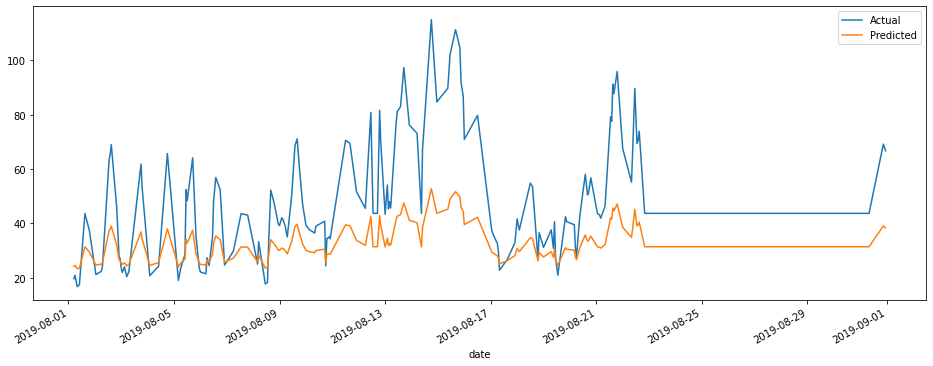

In [58]:
ser = data_for_2019_month_8
ser.plot(kind='line',figsize=(16, 6))

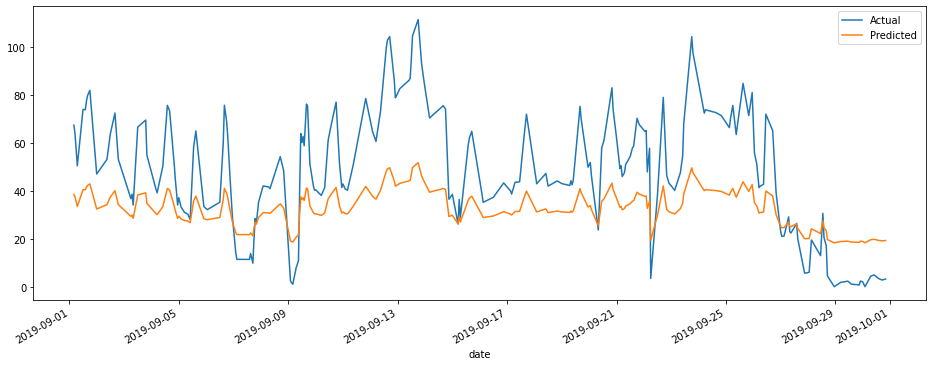

In [59]:
ser = data_for_2019_month_9
ser.plot(kind='line',figsize=(16, 6))

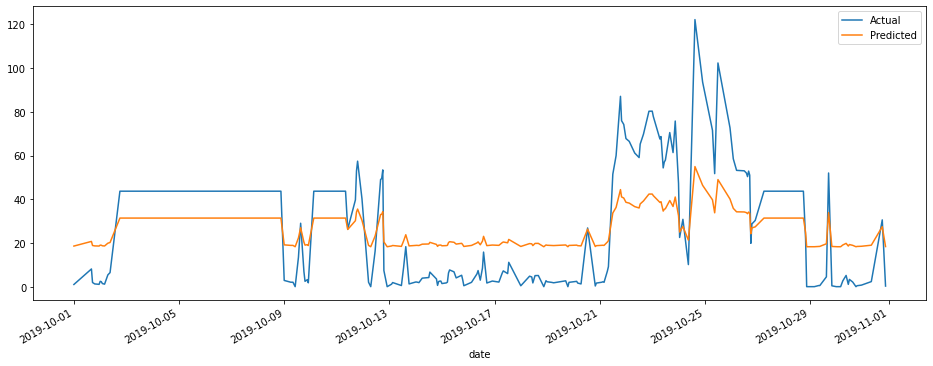

In [60]:
ser = data_for_2019_month_10
ser.plot(kind='line',figsize=(16, 6))

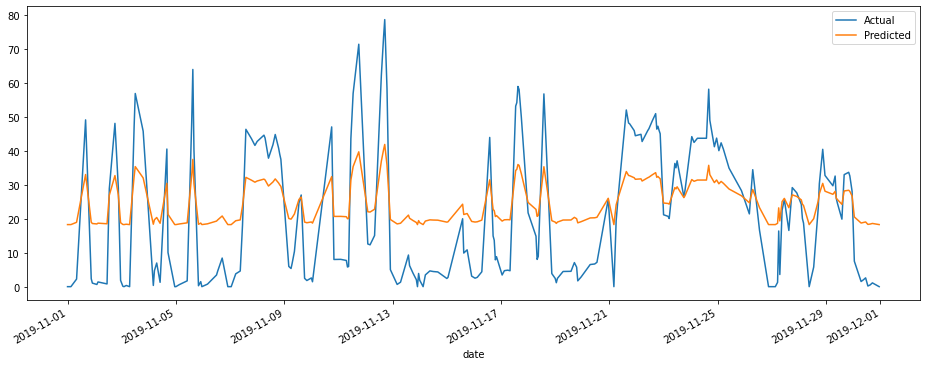

In [61]:
ser = data_for_2019_month_11
ser.plot(kind='line',figsize=(16, 6))

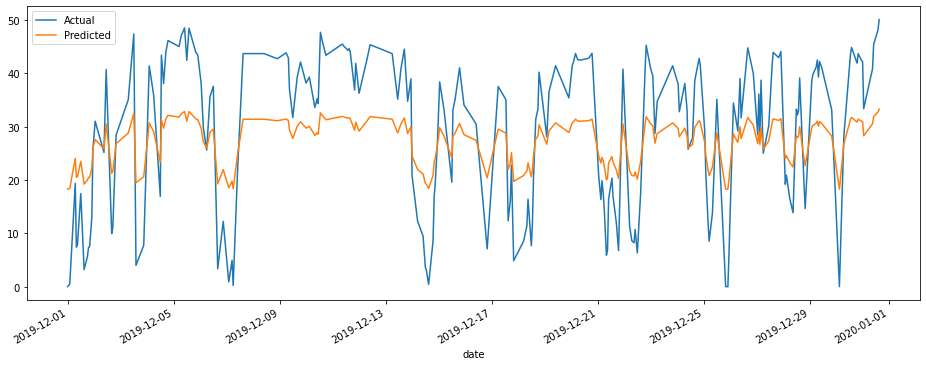

In [62]:
ser = data_for_2019_month_12
ser.plot(kind='line',figsize=(16, 6))

In [63]:
dataForMonth1_2 = data_for_2019_month_1.append(data_for_2019_month_2) 


In [64]:
dataForMonth1_2

,Actual,Predicted
date,,
2019-01-01 02:00:00,0.000000,18.275667
2019-01-01 05:00:00,0.000000,18.275667
2019-01-01 06:00:00,17.100543,23.407953
2019-01-01 07:00:00,26.452909,26.214823
2019-01-01 09:00:00,27.722988,26.596005
...,...,...
2019-02-28 04:00:00,1.898392,18.845420
2019-02-28 06:00:00,2.058150,18.893367
2019-02-28 14:00:00,47.547500,32.545819


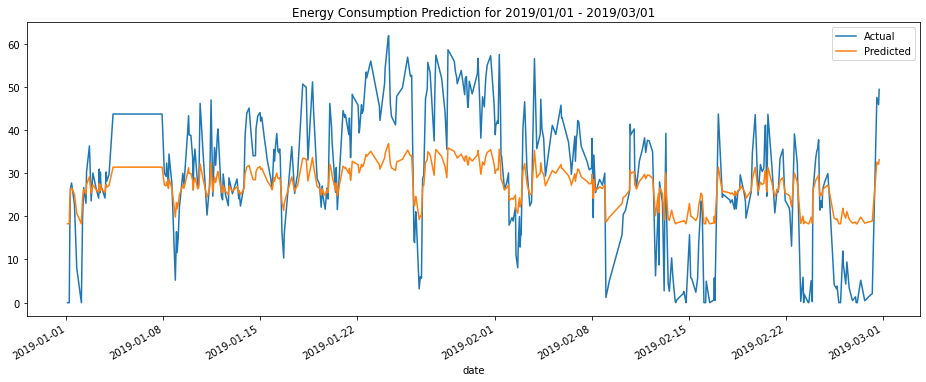

In [65]:
ser = dataForMonth1_2
ser.plot(kind='line',figsize=(16, 6), title = "Energy Consumption Prediction for 2019/01/01 - 2019/03/01")


In [66]:
dataForMonth1_2_3 = dataForMonth1_2.append(data_for_2019_month_3) 


In [67]:
dataForMonth1_2_3_4 = dataForMonth1_2_3.append(data_for_2019_month_4) 


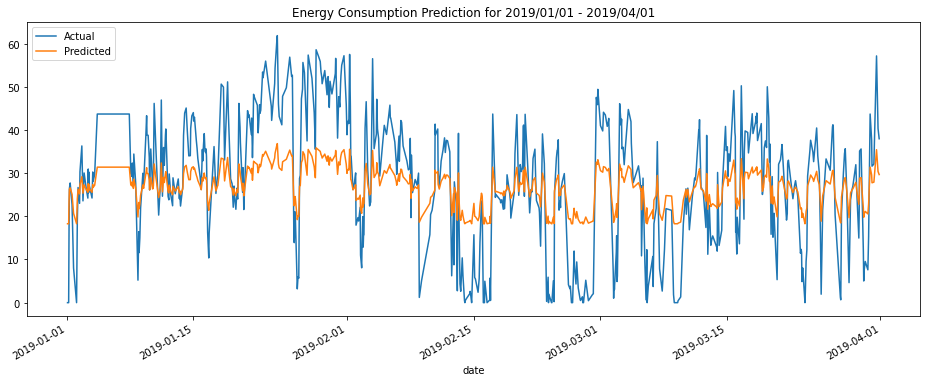

In [68]:
ser = dataForMonth1_2_3
ser.plot(kind='line',figsize=(16, 6), title = "Energy Consumption Prediction for 2019/01/01 - 2019/04/01")

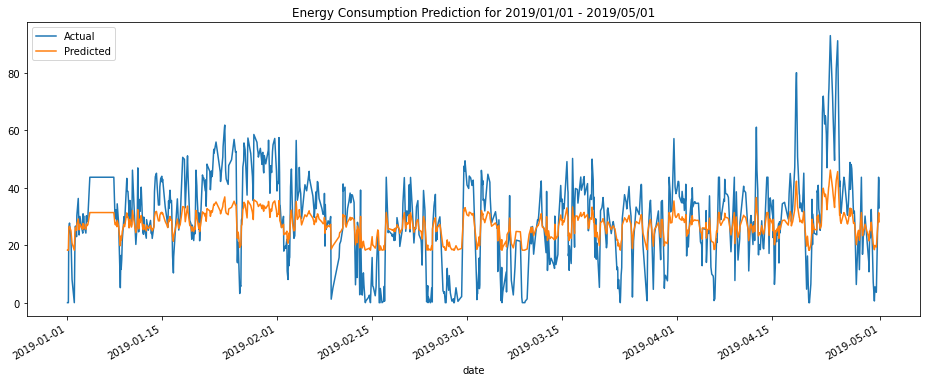

In [69]:
ser = dataForMonth1_2_3_4
ser.plot(kind='line',figsize=(16, 6), title = "Energy Consumption Prediction for 2019/01/01 - 2019/05/01")
